#**Project Name** - Amazon Prime TV Shows and Movies Analysis

###**Project Type** - EDA
###**Contribution** - Individual

#**Problem Statement**:
###The rapid expansion of vedios streaming platforms has created an environment where data-driven decision-making is critical for sustaining competitive advantage.Amazon Prime Video,with its vast library of movies and TV shows,faces the challenges of undestanding its diverse catalog in terms of content diversity,audience preferences.and regional distribution.
###This data was created to analyze all shows avalaible on Amozon Prime vedio and extract valuable insight.

###Some critical questions arise, such as:
* What type of content does Amazon Prime Video offer the most?
*Which countries contribute the highest number of titles?
* Does a higher IMDb rating always indicate higher popularity?
* Do long-running shows with more seasons perform better than short shows?
* How has audience interest changed over the years?

###Without data analysis, answering these questions becomes based on assumptions rather than facts.




#**Objective:**

###This project aims to analyze Amazon Prime vedio's catalog to uncover insights into audience perferences,content diversity and market trends.By exploring regions,release patterns,rating and enhance content strategy by identifying high performance.Boost audience engagement through data-driven reommendation.
* The first objective is to perform exploratory data analysis on Amazon Prime Video’s dataset using Python.

* The second objective is to analyze content diversity, focusing on variables such as age certification, runtime, genres, and production countries.

* The third objective is to study audience preferences using IMDb scores, TMDB scores, and popularity metrics.

* The fourth objective is to analyze content release patterns and popularity trends over time to understand how viewer interests evolve.

* The fifth objective is to explore relationships between multiple variables using univariate, bivariate, and multivariate analysis techniques.

#Overview:
The dataset used in this project comes from Amazon Prime Vedio's -originally inyeo files: titles.csv and credits.csv -and later cleaned and transformed.
The **'Amazon Prime TV Shows and Movies'** project analyzes Amazon Prime Vedio's content library to uncover key trends,pattrens,and insights using python.

Although both datasets were explored initially, the primary analysis focuses on the Titles dataset. This decision was taken because the project objectives are related to content attributes, ratings, trends, and regional distribution rather than actor-level or director-level analysis.

The Credits dataset was reviewed for structure and completeness but was not merged, as it was outside the scope of the current objectives.

##Dataset Used:

Titles Dataset: 9871 records covering tilte,genre,runtime,release year,and rating.
Credits Dataset: Approx 124000 entires detailing actors,directors,and their roles.




#Import basic library:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

##Dataset loading:

In [ ]:
#dataset load
data=pd.read_csv('/content/credits.csv (1).zip')
df=pd.read_csv('/content/titles.csv (1).zip')

###Dataset first veiw:

In [ ]:
data.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [ ]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


###Dataset row and column count:

In [ ]:
data.shape

(124235, 5)

In [ ]:
df.shape

(9871, 15)

###Dataset information:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  124235 non-null  int64 
 1   id         124235 non-null  object
 2   name       124235 non-null  object
 3   character  107948 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

###Duplicates Values:

In [ ]:
data.duplicated().sum()

np.int64(56)

In [ ]:
df.duplicated().sum()

np.int64(3)

###Missing values:

In [ ]:
data.isnull().sum()

,0
person_id,0
id,0
name,0
character,16287
role,0


In [ ]:
df.isnull().sum()

,0
id,0
title,0
type,0
description,119
release_year,0
age_certification,6487
runtime,0
genres,0
production_countries,0
seasons,8514


##Understanding Variables:

In [ ]:
data.columns

Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [ ]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

##**Variables Description**

The dataset consists of two files -- titles.csv  and credits.csv.Below is the description of the key variables:

*Titles Dataset*

* id: unique identifier of the title
* title: the name of the movie or show
* type: show or movie
* description: breif description of the title
* release_year:  in which year title was release
* age_certification: the age rating
* runtime: the length of episode or movie
* genres: a list of geners
* production countries: list of countries that produced the title
* seasons: the no. of seasons if it is a show
* imdb id: the title id on IMDB
* imdb scores: scores on IMDB
* imdb_votes: votes on  IMDB
* tmdb_popularity: popularity on TMDB
* tmdb_scores: scores on TMDB

*Credit Dataset*

* Person_id: the id of the person on just watch
* id: the title id on just Watch
* name: name of the actor or director
* character: character name
* role: Actor or director


##check unique values of all varibles:

###Credits:

In [ ]:
for i in data.columns:
  print(f'No. of unique values in {i} is: {len(data[i].unique())}')
  print('--------------------------------')

No. of unique values in person_id is: 80508
--------------------------------
No. of unique values in id is: 8861
--------------------------------
No. of unique values in name is: 79758
--------------------------------
No. of unique values in character is: 71098
--------------------------------
No. of unique values in role is: 2
--------------------------------


###Titles:

In [ ]:
for i in df.columns:
  print(f'No. of unique values in {i} is: {len(df[i].unique())}')
  print('--------------------------------')

No. of unique values in id is: 9868
--------------------------------
No. of unique values in title is: 9737
--------------------------------
No. of unique values in type is: 2
--------------------------------
No. of unique values in description is: 9735
--------------------------------
No. of unique values in release_year is: 110
--------------------------------
No. of unique values in age_certification is: 12
--------------------------------
No. of unique values in runtime is: 207
--------------------------------
No. of unique values in genres is: 2028
--------------------------------
No. of unique values in production_countries is: 497
--------------------------------
No. of unique values in seasons is: 33
--------------------------------
No. of unique values in imdb_id is: 9202
--------------------------------
No. of unique values in imdb_score is: 87
--------------------------------
No. of unique values in imdb_votes is: 3651
--------------------------------
No. of unique values in

#Data Wrangling:

###Handling Null values

In [ ]:
# remove null values
data.dropna(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
#check null values
null=data.isnull().sum()
print(null)

person_id    0
id           0
name         0
character    0
role         0
dtype: int64


In [ ]:
#check null values
null=df.isnull().sum()
print(null)

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64


##Handle Duplicates:

In [ ]:
# remove duplicates values
data.drop_duplicates(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#check duplicate values
dup=data.duplicated().sum()
print(f'now duplicate value is {dup}')

now duplicate value is 0


In [ ]:
#check duplicate values
dup=df.duplicated().sum()
print(f'now duplicate value is {dup}')

now duplicate value is 0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107902 entries, 0 to 124233
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  107902 non-null  int64 
 1   id         107902 non-null  object
 2   name       107902 non-null  object
 3   character  107902 non-null  object
 4   role       107902 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.9+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 9335
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    581 non-null    object 
 1   title                 581 non-null    object 
 2   type                  581 non-null    object 
 3   description           581 non-null    object 
 4   release_year          581 non-null    int64  
 5   age_certification     581 non-null    object 
 6   runtime               581 non-null    int64  
 7   genres                581 non-null    object 
 8   production_countries  581 non-null    object 
 9   seasons               581 non-null    float64
 10  imdb_id               581 non-null    object 
 11  imdb_score            581 non-null    float64
 12  imdb_votes            581 non-null    float64
 13  tmdb_popularity       581 non-null    float64
 14  tmdb_score            581 non-null    float64
dtypes: float64(5), int64(2), ob

In [ ]:
#released_year column datatype is int then convert into str after that we convert into datetime
df['release_year']=df['release_year'].astype('str')

In [ ]:
df.release_year.dtype

dtype('O')

In [ ]:
import datetime
df['release_year']=pd.to_datetime(df['release_year']).dt.normalize()
df['release_year'].dt.strftime('%Y-%m-%d')

,release_year
0,1934-01-01
956,1951-01-01
969,1968-01-01
980,1971-01-01
983,1966-01-01
...,...
9164,2021-01-01
9177,2021-01-01
9210,2021-01-01
9220,2021-01-01


In [ ]:
df['release_year'].dt.strftime('%Y-%m-%d').unique()

array(['1934-01-01', '1951-01-01', '1968-01-01', '1971-01-01',
       '1966-01-01', '1974-01-01', '1955-01-01', '1953-01-01',
       '1960-01-01', '1958-01-01', '1976-01-01', '1956-01-01',
       '1978-01-01', '1965-01-01', '1989-01-01', '1990-01-01',
       '1983-01-01', '1984-01-01', '1988-01-01', '1985-01-01',
       '1986-01-01', '1987-01-01', '2000-01-01', '1999-01-01',
       '1997-01-01', '1992-01-01', '1994-01-01', '1996-01-01',
       '1993-01-01', '1991-01-01', '1998-01-01', '2010-01-01',
       '2005-01-01', '2004-01-01', '2001-01-01', '2006-01-01',
       '2009-01-01', '2002-01-01', '2003-01-01', '2008-01-01',
       '2007-01-01', '2012-01-01', '2011-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2018-01-01',
       '2017-01-01', '2019-01-01', '2020-01-01', '2022-01-01',
       '2021-01-01'], dtype=object)

In [ ]:
df['seasons'] = df['seasons'].fillna(0).astype(int)
df['imdb_votes'] = df['imdb_votes'].fillna(0).astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 0 to 9335
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    581 non-null    object        
 1   title                 581 non-null    object        
 2   type                  581 non-null    object        
 3   description           581 non-null    object        
 4   release_year          581 non-null    datetime64[ns]
 5   age_certification     581 non-null    object        
 6   runtime               581 non-null    int64         
 7   genres                581 non-null    object        
 8   production_countries  581 non-null    object        
 9   seasons               581 non-null    int64         
 10  imdb_id               581 non-null    object        
 11  imdb_score            581 non-null    float64       
 12  imdb_votes            581 non-null    int64         
 13  tmdb_popularity       58

In [ ]:
#stastical report
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,581,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,2010-07-27 23:17:51.944922624,36.407917,3.872633,7.130809,19742.598967,22.503106,7.323236
min,1934-01-01 00:00:00,1.000000,1.000000,2.200000,5.000000,0.600000,0.800000
25%,2007-01-01 00:00:00,24.000000,1.000000,6.500000,512.000000,4.872000,6.700000
50%,2014-01-01 00:00:00,31.000000,2.000000,7.300000,2229.000000,10.832000,7.400000
75%,2018-01-01 00:00:00,49.000000,4.000000,8.000000,10827.000000,23.786000,8.000000
max,2022-01-01 00:00:00,92.000000,49.000000,9.400000,711566.000000,356.533000,10.000000
std,NaN,15.650731,5.172303,1.114465,64837.651668,41.098111,1.169613


###Stastical information:

* **released_year:**
1. count: the number of Non-null years is: 581
2. mean: average of years is: 2017
3. min: minimum year is: 1934
4. max: maximum year is 2022

* **runtime:**
1. count: the number of time is: 581
2. mean: average of time is: 36
3. std: standard deviation of time is: 15
4. min: minimum time is: 1
5. max: maximum time is: 92

* **seasons:**
1. count: the number of seasons : 581
2. mean: the average of seasons: 3
3. std: standard deviation of seasons: 5
4. min: minimum season: 1
5. max: maximum season: 49

* **imdb_score:**
1. count: the number of imdb score: 581
2. mean: the average of imdb score: 7
3. std: the standard deviation of imdb score: 1.11
4. min: the minimum  imdb score: 2.10
5. max: the maximum imdb score: 9.90

* **tmdb_popularity:**
1. count: number of tmdb popularity: 581
2. mean: average of tmdb popularity: 22
3. std: standard deviation of tndb: 41
4. min: minimum tmdb popularity: 0
5. max: maximum tbdb popularity: 356

* **tmdb_score:**
1. count: number of tmdb score: 581
2. mean: average of tmdb score: 7
3. std: standard deviation of score: 1.51
4. min: minimum tmdb score: 0
5. max: maximum tmdb score: 10

### Stastical information of only catagorical columns:

In [ ]:
#extract insight from this descibe function
df.describe()
df.describe(include='O')# 'O' means object


,id,title,type,description,age_certification,genres,production_countries,imdb_id
count,581,581,581,581,581,581,581,581
unique,581,579,1,581,6,335,41,581
top,ts314386,Bananas in Pyjamas,SHOW,"An intimate look at the reggaeton superstar, N...",TV-MA,['drama'],['US'],tt15553596
freq,1,2,581,1,205,22,272,1


In [ ]:
# extract only numerical columns
num=df.select_dtypes(include=['int64','float64'])
num.head()

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,19,26,8.6,1092,15.424,7.6
956,30,9,8.5,25944,17.088,8.1
969,29,31,8.7,8675,8.747,4.7
980,23,6,7.9,2116,45.829,8.0
983,24,12,8.1,4694,25.263,6.7


In [ ]:
#extract only categorical data
cat=df.select_dtypes(include='object')
cat.head()

,id,title,type,description,age_certification,genres,production_countries,imdb_id
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,TV-PG,"['comedy', 'family', 'animation', 'action', 'f...",['US'],tt0850645
956,ts20005,I Love Lucy,SHOW,Cuban Bandleader Ricky Ricardo would be happy ...,TV-G,"['comedy', 'family']",['US'],tt0043208
969,ts42867,Mister Rogers' Neighborhood,SHOW,Mister Rogers' Neighborhood is an American chi...,TV-Y,"['fantasy', 'music', 'family']",['US'],tt0062588
980,ts21930,Lupin the Third,SHOW,Arsene Lupin III is the grandson of the master...,TV-14,"['scifi', 'animation', 'action', 'comedy', 'cr...",['JP'],tt0159175
983,ts14548,Dark Shadows,SHOW,Dark Shadows is an American gothic soap opera ...,TV-PG,"['scifi', 'romance', 'thriller', 'drama', 'fan...",['US'],tt0059978


##Handling the outlier:
* **method1:** visualization with the help of box plot.
* **method2:** statistical with the help of IQR method.

###Method1:

<Axes: xlabel='runtime'>

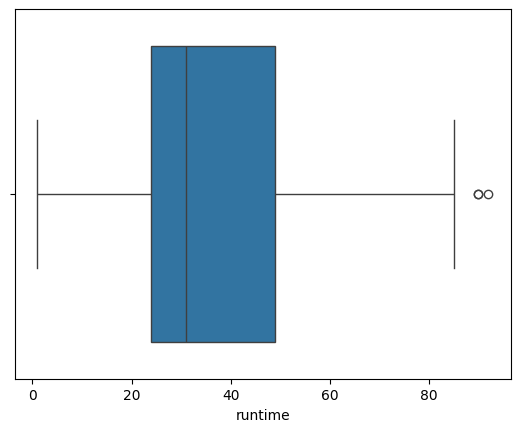

In [ ]:
#method1:
sns.boxplot(x=df['runtime'])



###In plot you can see that:
* mean runtime = 36
* median runtime= 31
* lower quartile of runtime = 24
* upper quartile of runtime = 49

##Through visualize we find that there is an outlier in runtime.

##We find outlier with the help of stastics:
###Method2:  Inter Quartile range (IQR) metthod



* **find the Quartile:**
1. First quartile
2. Third quartile

In [ ]:
q1=df.loc[:,'runtime'].quantile(0.25)
q3=df.loc[:,'runtime'].quantile(0.75)
print('first quartile:' ,q1)
print('Third quartile:' , q3)


first quartile: 24.0
Third quartile: 49.0



* **Calculate IQR:**
                  



In [ ]:
IQR=q3-q1
print('Inter quartile Range:' , IQR)

Inter quartile Range: 25.0


* **Determine the outlier Boundaries:**

1. lower bound
2. upper bound



In [ ]:
lower_limit=q1-1.5*IQR
upper_limit=q3+1.5*IQR
print('lower limit:', lower_limit)
print('upper limit:', upper_limit)

lower limit: -13.5
upper limit: 86.5


###find the outliers:

In [ ]:
outlier=df[(df.loc[:,'runtime']<lower_limit) | (df.loc[:,'runtime']>upper_limit)].index
outlier

Index([4579, 4623, 4661], dtype='int64')

###we analysis that and find there is 3 outlier in the runtime.

#Data Visualization:



##Univariate Analysis:

###Distribution of age certification:

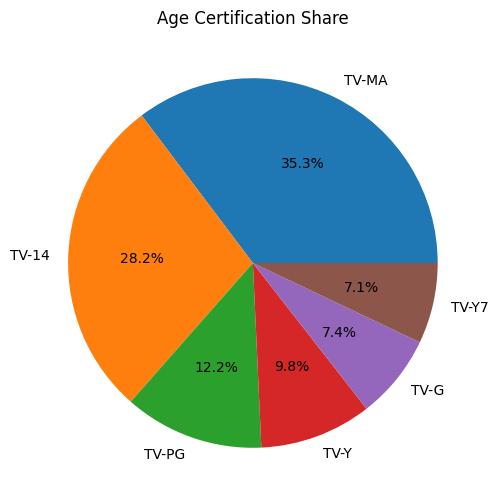

In [ ]:
age_counts = df['age_certification'].value_counts().reset_index()
age_counts.columns = ['age_certification', 'count']


age_counts.set_index('age_certification')['count'].plot(
    kind='pie', autopct='%1.1f%%', figsize=(6,6)
)
plt.ylabel('')
plt.title('Age Certification Share')
plt.show()


###Why this chart is used:

* The code calculates the count of each age certification

* These counts are converted into percentages using a pie chart

*  A pie chart is used to show the proportion (share) of each age certification

* It is suitable because only one categorical column is analyzed

###Insights:
* The chart shows the percentage distribution of titles across different age certifications

* A few age certification categories a larger share of the dataset

* Some age certifications have a much smaller percentage, indicating limited content

* The content library is not evenly distributed across age groups

* The platform focuses more on specific target age audiences

###Distribution of Titles Across Top 10 Production Countries


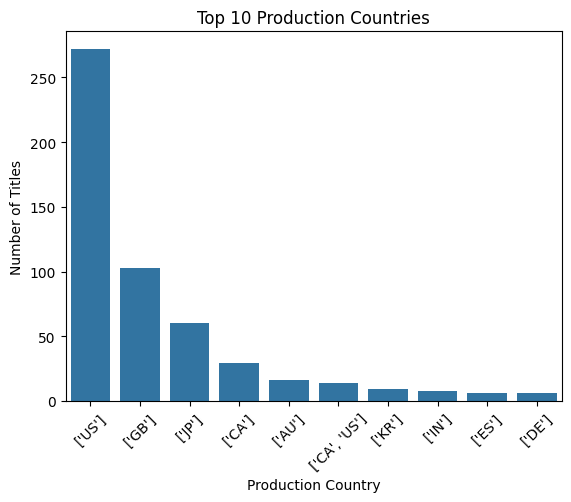

In [ ]:
# Count titles by production country
country_counts = df['production_countries'].value_counts().reset_index()
country_counts.columns = ['production_country', 'count']

# Top 10 production countries
top_countries = country_counts.head(10)

sns.barplot(data=top_countries, x='production_country', y='count')
plt.xticks(rotation=45)
plt.xlabel('Production Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Production Countries')
plt.show()


##why used this chart:
1. A bar chart is best for categorical data.
2. It clearly shows frequency or count for each category.
3. It makes comparison between categories easy.
4. Differences between countries are visually clear.



##Insights:
1. US country produce most of the content.
2. Content production is not evenly distributed.
3. One or two countries dominate the platform’s library
4. Smaller contributions come from many other countries



##Distribution of runtime:

In [ ]:
fig=px.histogram(df, x='runtime',title='Distribution of runtime',color_discrete_sequence=['black'])

fig.update_layout(height=400,width=600,
                  title_font=dict(size=15,color='pink'),
                  font=dict(size=10,color='green'),
                  bargap=0.09,plot_bgcolor='red'
                  )
fig.show()

###why used Histogram plot?
1. To visualize the distribution of runtime.
2. To check which runtime have more apperance.
3. To detect outlier easily.

###Insights:
1. The runtime distribution is right-skewed.
2. Short runtimes are less common.
3. Most titles have moderate runtimes.

##Bivariate Analysis:

###To see the relationship between Seasons vs IMDB scores.

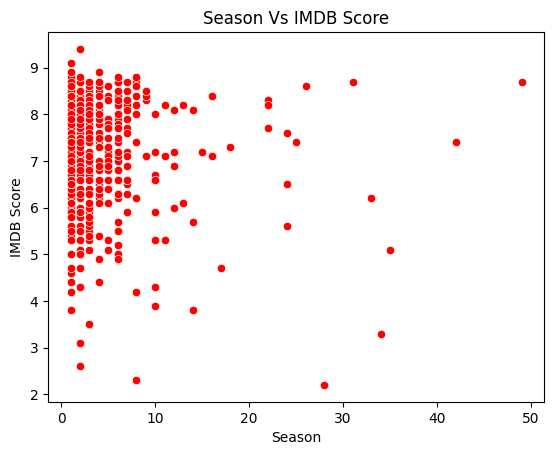

In [ ]:
sns.scatterplot(df, x='seasons',y='imdb_score',color='red')
plt.xlabel('Season')
plt.ylabel('IMDB Score')
plt.title('Season Vs IMDB Score')
plt.show()

###Why I use this plot?
1. When we want to compare two numerical variable then scatter plot is the best option.
2. To detect trends and patterns.
3. To identify outliers.

###Insights:
1. There is no strong upward or downward trends.
2. Shows which have seasons from 0 to 10,have a high imdb scores.
3. Some Shows which have 1 season also have excellent rating.

##Released Year Vs tmdb Popularity:

In [ ]:
# Remove duplicate years by grouping (each year appears only once)
df_year_pop = df.groupby('release_year', as_index=False)['tmdb_popularity'].mean()


fig = px.line(df_year_pop,x='release_year',y='tmdb_popularity',title='TMDB Popularity Trend by Release Year',markers=True)

fig.update_layout(
    xaxis_title='Release Year',
    yaxis_title='Average TMDB Popularity',
    height=450,
    width=700,
    plot_bgcolor='white'
)

fig.show()


###Why lineplot is used?
1. Lineplot is the best to show how something changes over time.
2. To observe popualarity over time.
3. Best plot to show patterns and peak.

###Insights:
1. In jan 1987 tmdb popularity is high.
2. In jan 1978 tmdb popualarity is low.
3. Audience change interest over time.

##Multivariate Analysis:


###Show correlation Between numerical data:

In [ ]:
import plotly.graph_objects as go

# Select numerical columns
numerical_cols = ['runtime', 'seasons', 'imdb_score', 'tmdb_popularity']

# Correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create heatmap with graph objects
fig = go.Figure(
    data=go.Heatmap(
        z=corr_matrix.values,          # correlation values
        x=corr_matrix.columns,         # column names
        y=corr_matrix.columns,         # column names
        colorscale='RdBu',             # blue-red scale
         zmin=-1,
        zmax=1,
        text=np.round(corr_matrix.values, 2),   # show rounded numbers
        texttemplate="%{text}",             # display text
        colorbar=dict(title="Correlation")
    )
)

fig.update_layout(
    title="Correlation Heatmap (Using Plotly Graph Objects)",
    width=700,
    height=500,
    title_font=dict(size=18)
)

fig.show()


###Why:
1. Its helps to identify relationship between numerical variable.
2. Easy to compare multiple variable at a one.
3. Helps to select features of multivarate analysis.


###Insights:
1. Seasons Vs tmdb_popularity show strong positive correlation.
2. imbd_score vs Seasons show moderate positive correlation.
3. Runtime Vs seasons show strong negative correlation.
4. Seasons Vs imbdb score show weak negative correlation.



##Rating vs popularity by country

##


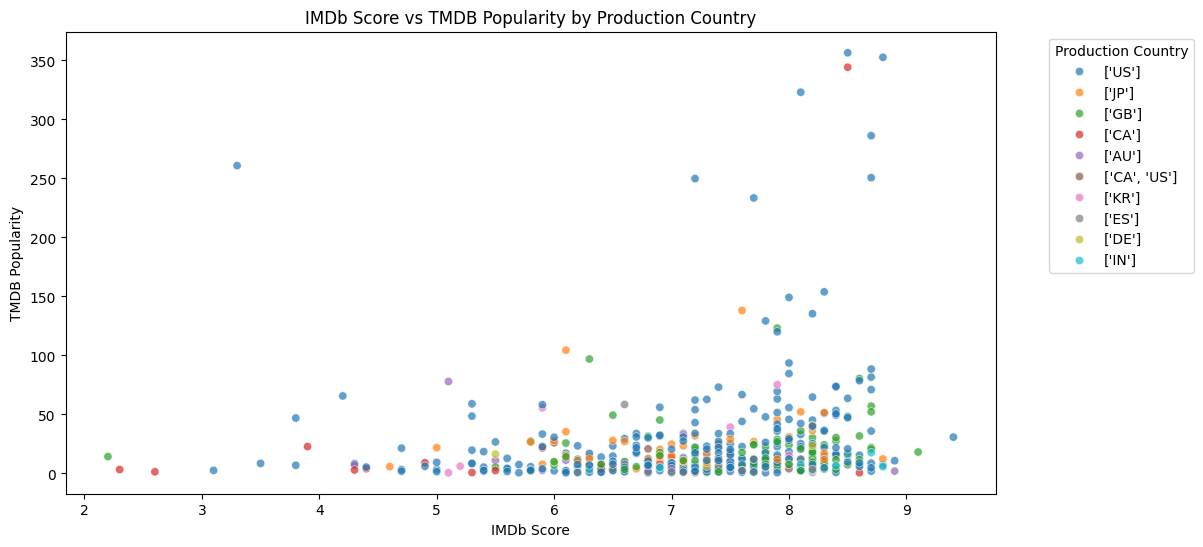

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 10 production countries
top_countries = df['production_countries'].value_counts().head(10).index
df_top = df[df['production_countries'].isin(top_countries)]

plt.figure(figsize=(12,6))

sns.scatterplot(
    data=df_top,
    x='imdb_score',
    y='tmdb_popularity',
    hue='production_countries',
    alpha=0.7
)

plt.xlabel('IMDb Score')
plt.ylabel('TMDB Popularity')
plt.title('IMDb Score vs TMDB Popularity by Production Country')
plt.legend(title='Production Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


###Why i used this graph:
* To analyze three variables together (multivariate analysis)

* To see how IMDb score relates to popularity

* To compare this relationship across production countries

* A scatter plot is suitable because it shows relationships between numerical variables

* Color (hue) helps differentiate countries

###Insights:

* IMDb score and TMDB popularity show a weak relationship

* High popularity does not always mean higher IMDb ratings

* Some countries produce content with higher popularity but varied ratings

* Content performance varies across production countries

* No single country consistently dominates both rating and popularity

#Conclusion:
This exploratory data analysis provided valuable insights into Amazon Prime’s movies and TV shows catalog. The analysis revealed that the platform’s content is dominated by a few major production countries, indicating an uneven regional distribution. Most titles fall within a moderate runtime range, and extreme runtimes were identified as outliers but did not significantly impact overall trends.

The study of audience ratings showed that IMDb and TMDB scores are generally concentrated in the mid to high range, suggesting that the majority of content on the platform is reasonably well received. While some shows with fewer seasons achieved high ratings, no strong linear relationship was observed between the number of seasons and audience scores, indicating that content quality does not solely depend on longevity.

Trend analysis across release years highlighted changes in audience popularity over time, reflecting evolving viewer preferences and content strategies. Correlation analysis further confirmed that most numerical features have weak to moderate relationships, emphasizing the diverse nature of content performance on the platform.